<a href="https://colab.research.google.com/github/KuntaMallikRaj/-LGMVIP-Web-Task-1/blob/main/copy_of_major.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install catboost
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error

# Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.9 MB/s eta 0:00:00


In [ ]:
df = pd.read_excel("hyderabad_house_prices_3000.xlsx")

# Define features and target
X = df[["Location", "Size", "Total_Sqft", "Bath", "Balcony", "Year_Built"]]
y = df["Price"]

# Split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing
categorical_features = ["Location", "Size"]
numerical_features = ["Total_Sqft", "Bath", "Balcony", "Year_Built"]

preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ("num", StandardScaler(), numerical_features)
])
print(X)
print(y)


         Location   Size  Total_Sqft  Bath  Balcony  Year_Built
0       Manikonda  1 BHK         945     4        0        2006
1        Madhapur  3 BHK        2968     2        1        2024
2        LB Nagar  1 BHK        2379     4        2        1997
3        Kompally  3 BHK         975     1        0        2016
4        Begumpet  3 BHK         743     4        0        2004
...           ...    ...         ...   ...      ...         ...
2995     Begumpet  4 BHK        4000     4        0        2002
2996    Manikonda  4 BHK        1969     1        0        2019
2997     Kompally  3 BHK        2993     4        2        1999
2998     Madhapur  1 BHK        3357     1        0        2009
2999  Hitech City  2 BHK        1029     2        2        2017

[3000 rows x 6 columns]
0        60
1       188
2        99
3        52
4        45
       ... 
2995    182
2996    100
2997    159
2998    113
2999     74
Name: Price, Length: 3000, dtype: int64


In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42, verbosity=0),
    "LightGBM": LGBMRegressor(n_estimators=100, random_state=42),
    "CatBoost": CatBoostRegressor(verbose=0, random_state=42),
    "SVR": SVR(),
    "KNN": KNeighborsRegressor(n_neighbors=5),
    "Neural Network": MLPRegressor(hidden_layer_sizes=(64, 64), max_iter=500, random_state=42)
}

In [ ]:
results = {}
trained_pipelines = {}

print("Training models and evaluating performance...\n")
for name, model in models.items():
    pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("regressor", model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Fixed for compatibility
    results[name] = {"R2 Score": r2, "RMSE": rmse}
    trained_pipelines[name] = pipeline
    print(f"{name}: R2 = {r2:.4f}, RMSE = {rmse:.2f} Lakhs")

Training models and evaluating performance...

Linear Regression: R2 = 0.7587, RMSE = 27.76 Lakhs
Decision Tree: R2 = 0.4648, RMSE = 41.35 Lakhs
Random Forest: R2 = 0.7335, RMSE = 29.18 Lakhs
XGBoost: R2 = 0.6848, RMSE = 31.73 Lakhs


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000186 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 324
[LightGBM] [Info] Number of data points in the train set: 2400, number of used features: 18
[LightGBM] [Info] Start training from score 112.340000
LightGBM: R2 = 0.7435, RMSE = 28.62 Lakhs
CatBoost: R2 = 0.7495, RMSE = 28.29 Lakhs
SVR: R2 = 0.6818, RMSE = 31.88 Lakhs
KNN: R2 = 0.6828, RMSE = 31.83 Lakhs
Neural Network: R2 = 0.7576, RMSE = 27.83 Lakhs


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


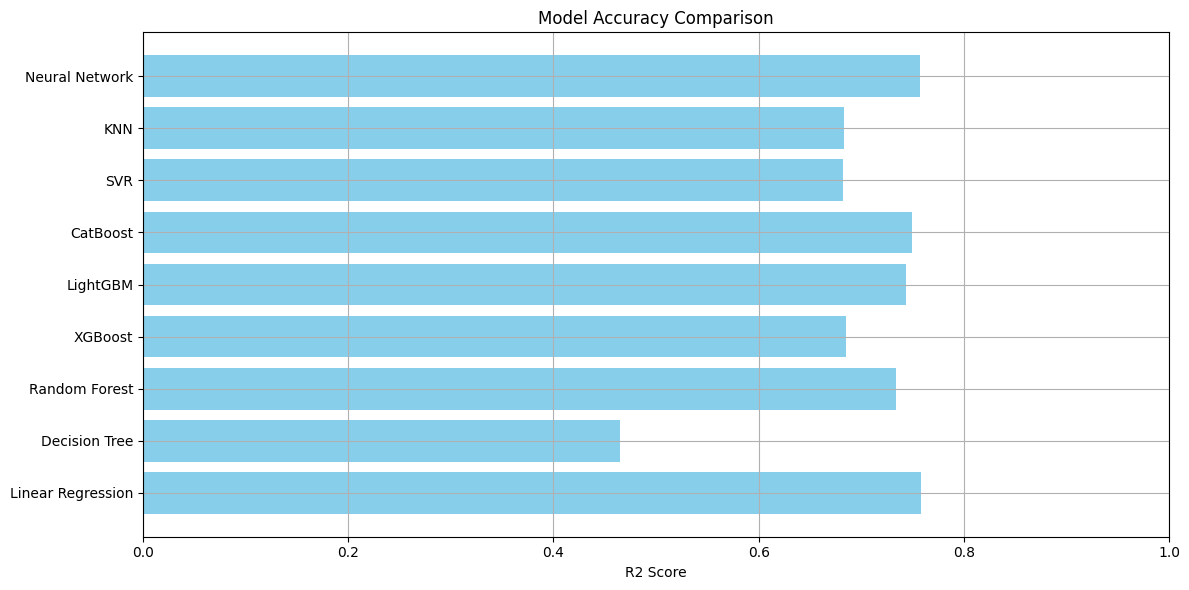

In [ ]:
model_names = list(results.keys())
r2_scores = [results[m]["R2 Score"] for m in model_names]

plt.figure(figsize=(12, 6))
plt.barh(model_names, r2_scores, color='skyblue')
plt.xlabel("R2 Score")
plt.title("Model Accuracy Comparison")
plt.xlim(0, 1)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
print("\n--- Manual House Price Prediction ---")

# Default values
default_location = "Gachibowli"
default_size = "2 BHK"
default_total_sqft = 1200
default_bath = 2
default_balcony = 1
default_year_built = 2015

# Input with default values
location = input(f"Enter Location (e.g., {default_location}): ") or default_location
size = input(f"Enter Size (e.g., {default_size}): ") or default_size
total_sqft = input(f"Enter Total Sqft (e.g., {default_total_sqft}): ")
total_sqft = float(total_sqft) if total_sqft else default_total_sqft
bath = input(f"Enter number of Bathrooms (e.g., {default_bath}): ")
bath = int(bath) if bath else default_bath
balcony = input(f"Enter number of Balconies (e.g., {default_balcony}): ")
balcony = int(balcony) if balcony else default_balcony
year_built = input(f"Enter Year Built (e.g., {default_year_built}): ")
year_built = int(year_built) if year_built else default_year_built

# Create the DataFrame with user input
manual_input = pd.DataFrame([{
    "Location": location,
    "Size": size,
    "Total_Sqft": total_sqft,
    "Bath": bath,
    "Balcony": balcony,
    "Year_Built": year_built
}])

# Use the best model (highest R2) for prediction
best_model_name = max(results, key=lambda x: results[x]["R2 Score"])
best_pipeline = trained_pipelines[best_model_name]

predicted_price = best_pipeline.predict(manual_input)[0]
print(f"\nPredicted Price (by {best_model_name}): ₹{predicted_price:.2f} Lakhs")


--- Manual House Price Prediction ---
Enter Location (e.g., Gachibowli): 
Enter Size (e.g., 2 BHK): 
Enter Total Sqft (e.g., 1200): 
Enter number of Bathrooms (e.g., 2): 
Enter number of Balconies (e.g., 1): 
Enter Year Built (e.g., 2015): 

Predicted Price (by Linear Regression): ₹62.04 Lakhs
